# Analytical Analysis

Let be:

$$\Delta_u = 18\hat{k}\hat{\beta} + \hat{k}^2 - 4 - 4\hat{k}^3\hat{\beta} - 27 \hat{\beta}^2$$

##In terms of $u$:

### For $\Delta u$ $<0$

$$A_1 = -\left( 54\hat{k}^3 - 243\hat{k} + 729\hat{\beta} \right)$$
$$A_2 = \sqrt{\left( 54\hat{k}^3 - 243\hat{k} + 729\hat{\beta} \right)^2 + 2916 \left(3 - \hat{k}^2\right)^3 } $$
$$ $$
$$u_1 = -\dfrac{\hat{k}}{3} + \dfrac{\sqrt[3]{4}}{18} \left( \sqrt[3]{A_1 + A_2} + \sqrt[3]{A_1 - A_2} \right)$$
$$u_2 = \left[ - \dfrac{\hat{k}}{3}  - \dfrac{\sqrt[3]{4}}{36} \left( \sqrt[3]{A_1 + A_2} + \sqrt[3]{A_1 - A_2} \right) \right] + \left[ \dfrac{\sqrt{3}\sqrt[3]{4}}{36} \left( \sqrt[3]{A_1 + A_2} - \sqrt[3]{A_1 - A_2} \right) \right]i$$
$$u_3 = \left[ - \dfrac{\hat{k}}{3}  - \dfrac{\sqrt[3]{4}}{36} \left( \sqrt[3]{A_1 + A_2} + \sqrt[3]{A_1 - A_2} \right) \right] + \left[ - \dfrac{\sqrt{3}\sqrt[3]{4}}{36} \left( \sqrt[3]{A_1 + A_2} - \sqrt[3]{A_1 - A_2} \right) \right]i$$

### For $\Delta u$ $ = 0$

$$\hat{\beta} =   \dfrac{\sqrt{3}}{9} \,\,\,  \land \,\,\, \hat{k} =  \sqrt{3} \,\,\, \longrightarrow \,\,\, u_1 = - \dfrac{ \hat{k}}{3} = - \dfrac{\sqrt{3}}{3}$$
$$ $$
$$\hat{\beta} =  - \dfrac{\sqrt{3}}{9} \,\,\,  \land \,\,\, \hat{k} = - \sqrt{3} \,\,\, \longrightarrow \,\,\, u_1 = - \dfrac{ \hat{k}}{3} = \dfrac{\sqrt{3}}{3}$$

### For $\Delta u $ $> 0$

$$u_{1} =\dfrac{2}{3}\sqrt{\hat{k}^2-3}\,\,\,\text{cos}\left( \dfrac{1}{3} \text{arccos}\left( \dfrac{4\hat{k}^3-9\hat{k}+27\hat{\beta}}{18 - 6\hat{k}^2} \sqrt{\dfrac{9}{\hat{k}^2-3}}\right)\right) - \dfrac{\hat{k}}{3}$$

$$u_{2} = \dfrac{2}{3}\sqrt{\hat{k}^2-3}\,\,\, \text{cos}\left( \dfrac{1}{3} \text{arccos}\left( \dfrac{4\hat{k}^3-9\hat{k}+27\hat{\beta}}{18 - 6\hat{k}^2} \sqrt{\dfrac{9}{\hat{k}^2-3}}\right) + \dfrac{2\pi}{3}\right) - \dfrac{\hat{k}}{3}$$

$$u_{3} = \dfrac{2}{3}\sqrt{\hat{k}^2-3}\,\,\, \text{cos}\left( \dfrac{1}{3} \text{arccos}\left( \dfrac{4\hat{k}^3-9\hat{k}+27\hat{\beta}}{18 - 6\hat{k}^2} \sqrt{\dfrac{9}{\hat{k}^2-3}}\right) + \dfrac{4\pi}{3}\right) - \dfrac{\hat{k}}{3}$$



## In terms of $\theta$:

Given that we did the transformation $\theta = u^2$, we can say that:

$$\theta_i = u_i ^ 2 \Longleftrightarrow \text{Re}(u_i) \geq 0$$



# Coding and plotting

## Define solutions

We design the solutions of our cubic equation and $\theta$ equation given the analytical process

In [1]:
import sys
import numpy as np

sys.path.append("..")

from magnetic_isolation.solutions import u_values, theta_values, cubic_poly

We verified that the solution remains close to zero, with a tolerance of $10^{-9}$

In [2]:
import time

start = time.time()
errhigh = []
cases = 0
for k in range(-100,100,1):
    k = k/10
    for b in range(-100,100,1):
        b = b/10
        u = u_values(k,b)
        for r in u:
            cases += 1
            t = abs(cubic_poly(k,b,r))<1e-9
            if not t:
                errhigh.append((k,b,cubic_poly(k,b)))
end = time.time()
print(f'Time used: {(end-start):.4f} seconds')
print(f'After {cases} cases evaluated, {len(errhigh)} cases had a wrong value')
if len(errhigh)>0:
  print(f'Wrong cases: {errhigh}')

Time used: 0.7292 seconds
After 120000 cases evaluated, 0 cases had a wrong value


Since we have verified that our solutions are working correctly, we will design a routine that allows us to obtain a grid of solutions, which we will save in a DataFrame for later plotting.

In [3]:
from magnetic_isolation.solutions import get_fixed_b, get_fixed_k, get_grid

We generated a test set to design the corresponding graphs.

In [4]:
import time
start = time.time()
df = get_grid(mink = -20, maxk = 20, minb = -20, maxb = 20, num_points = 100)
end = time.time()
print(f'The generation process took {(end-start):.3f} seconds \n')
df.info()

The generation process took 0.248 seconds 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   k          30000 non-null  float64
 1   b          30000 non-null  float64
 2   u_real     30000 non-null  float64
 3   u_complex  30000 non-null  float64
dtypes: float64(4)
memory usage: 937.6 KB


## Solutions over $u$

### First set of plots (2D views for real and imaginary part)

We designed a couple of routines that allow us to visualize the real and imaginary parts of each section, starting from a fixed parameter ($\hat{k}$ or $\hat{\beta}$).

In [5]:
from magnetic_isolation.bifurcation_plots import u_plot_fixed_b, u_plot_fixed_k

With these defined functions, we can generate the graphs associated with different points of interest in two dimensions.

Special value with multiplicity 3

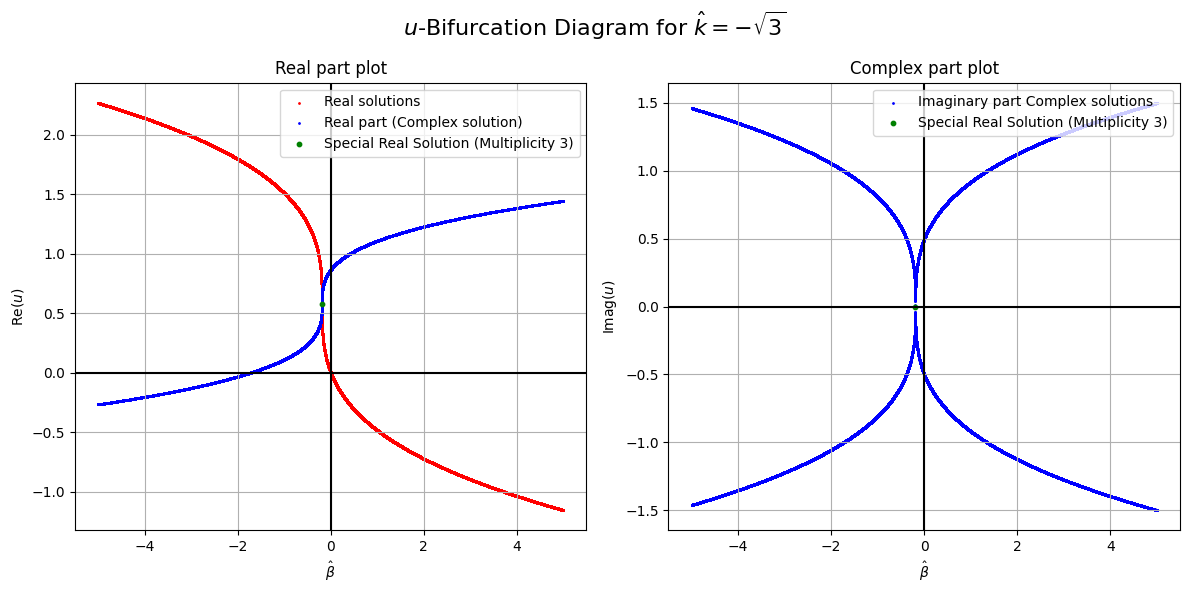

In [6]:
k = -np.sqrt(3)
df_ = get_fixed_k(k=k, minb=-5,maxb=5,num_points = 100000)
marker_point = (-np.sqrt(3)/9,np.sqrt(3)/3,0,"Special Real Solution (Multiplicity 3)")
u_plot_fixed_k(df_,k = k,klabel = '- \\sqrt{3}',mark_point = marker_point, save = None)

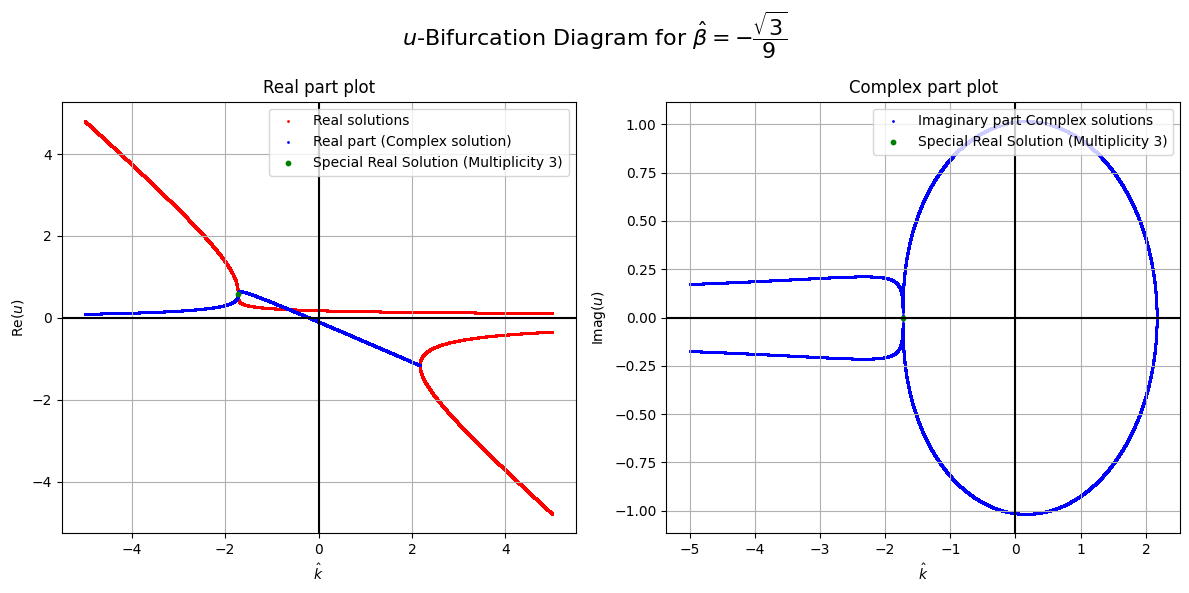

In [7]:
b = -np.sqrt(3)/9
df_ = get_fixed_b(b=b, minb=-5,maxb=5,num_points = 100000)
marker_point = (-np.sqrt(3),np.sqrt(3)/3,0,"Special Real Solution (Multiplicity 3)")
u_plot_fixed_b(df_,b=b,blabel = '- \\dfrac{\\sqrt{3}}{9}',mark_point = marker_point, save=None)

Null parameters ($=0$)

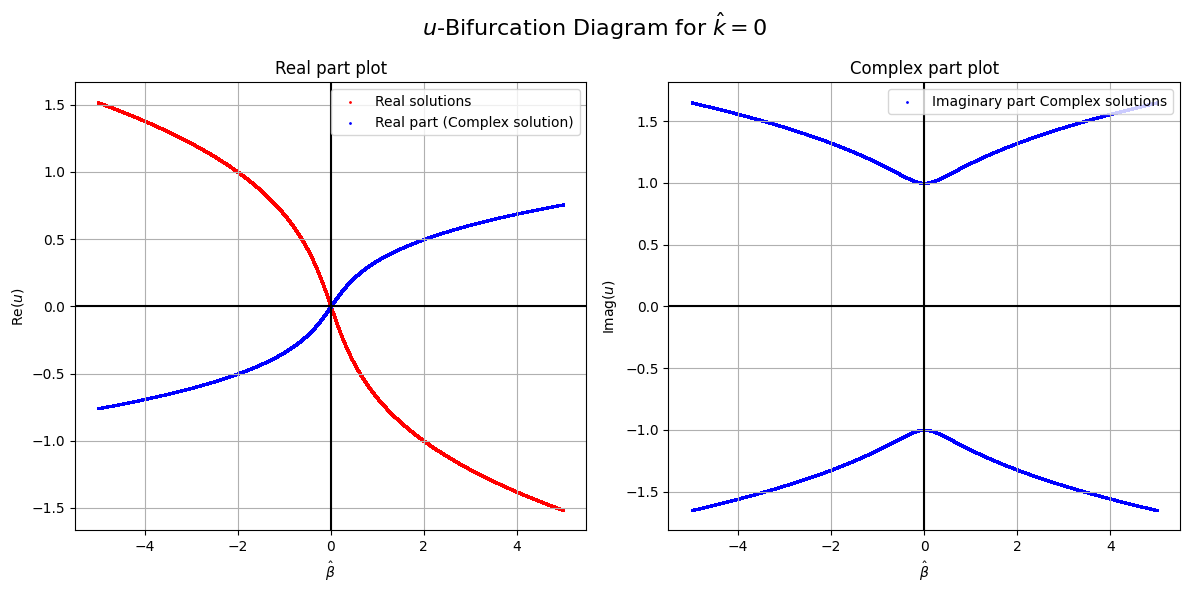

In [8]:
k = 0
df_ = get_fixed_k(k=k, minb=-5,maxb=5,num_points = 100000)
u_plot_fixed_k(df_,k = k,save=None)

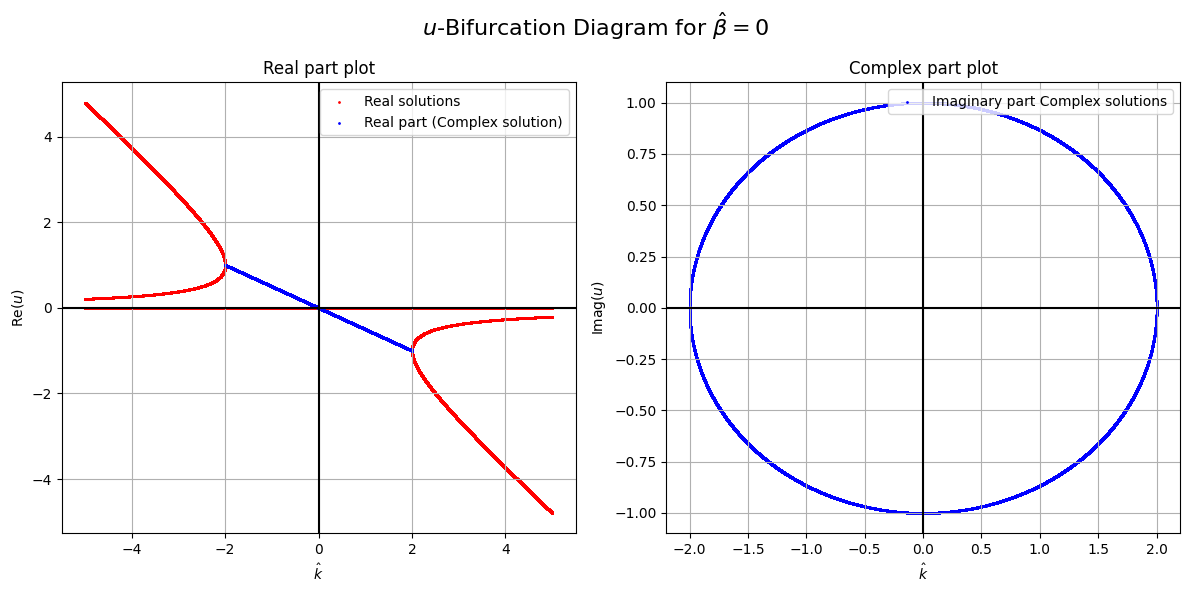

In [9]:
b = 0
df_ = get_fixed_b(b=b, minb=-5,maxb=5,num_points = 100000)
u_plot_fixed_b(df_,b=b,save=None)

### Second set of plots (3D static plot x = k, y = beta , z = real part and x = k, y = beta , z = imaginary part)

In [10]:
from magnetic_isolation.bifurcation_plots import u_plot_kb_3d

In [11]:
grid = get_grid(mink = -5, maxk = 5, minb = -5, maxb = 5, num_points = 100)
grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   k          30000 non-null  float64
 1   b          30000 non-null  float64
 2   u_real     30000 non-null  float64
 3   u_complex  30000 non-null  float64
dtypes: float64(4)
memory usage: 937.6 KB


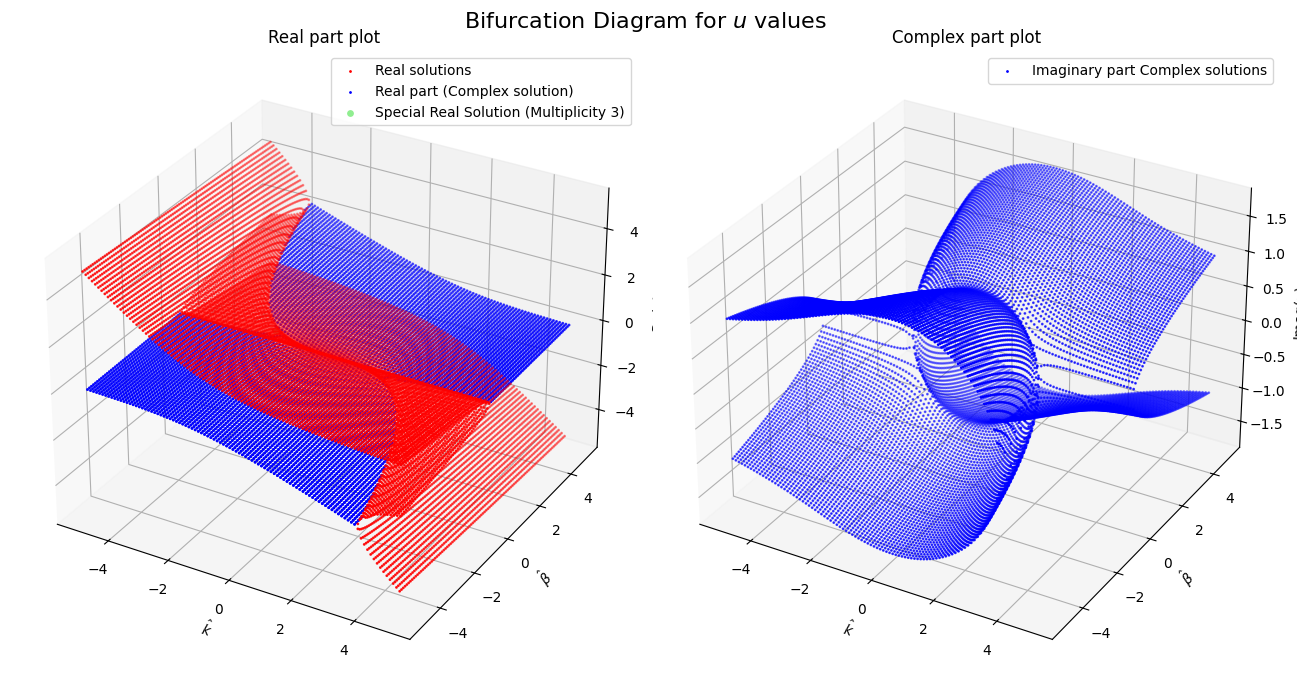

In [12]:
marker_point = (-np.sqrt(3),-np.sqrt(3)/9,np.sqrt(3)/3,"Special Real Solution (Multiplicity 3)")
u_plot_kb_3d(grid,save=None,mark_point_real=marker_point)

## Solutions over $\theta$

### Third set of plots (2D views) for $\theta$ values

In [13]:
from magnetic_isolation.bifurcation_plots import theta_plot_fixed_k, theta_plot_fixed_b

Special value with multiplicity 3

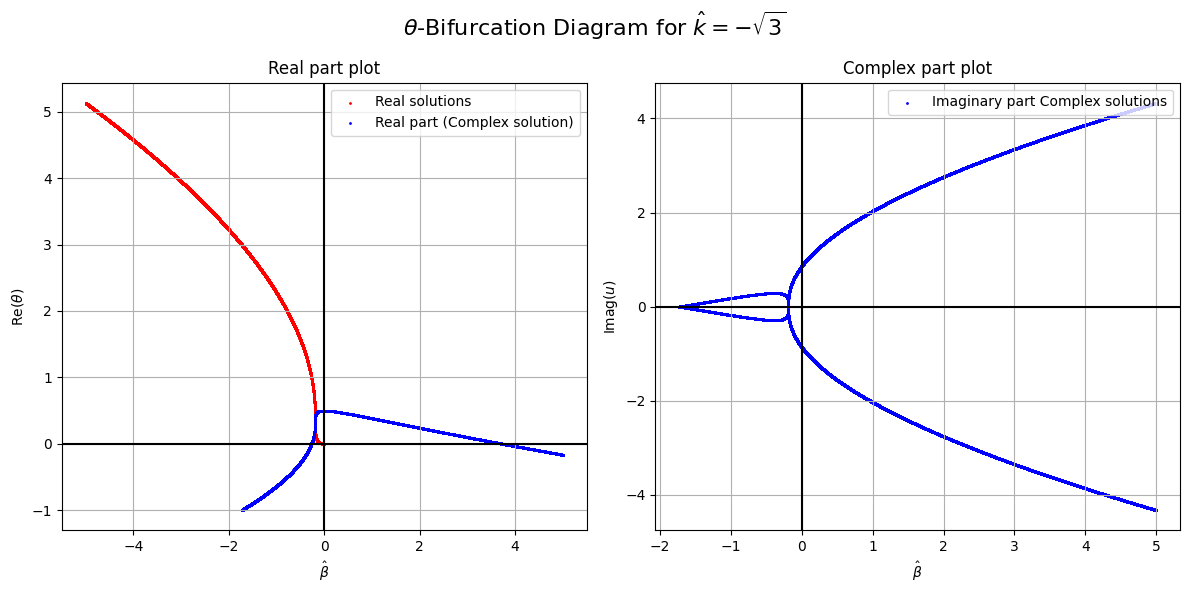

In [14]:
k = -np.sqrt(3)
df_ = get_fixed_k(k=k, minb=-5,maxb=5,num_points = 100000,fun = theta_values)
theta_plot_fixed_k(df_,k = k,klabel = '- \\sqrt{3}', save = None)

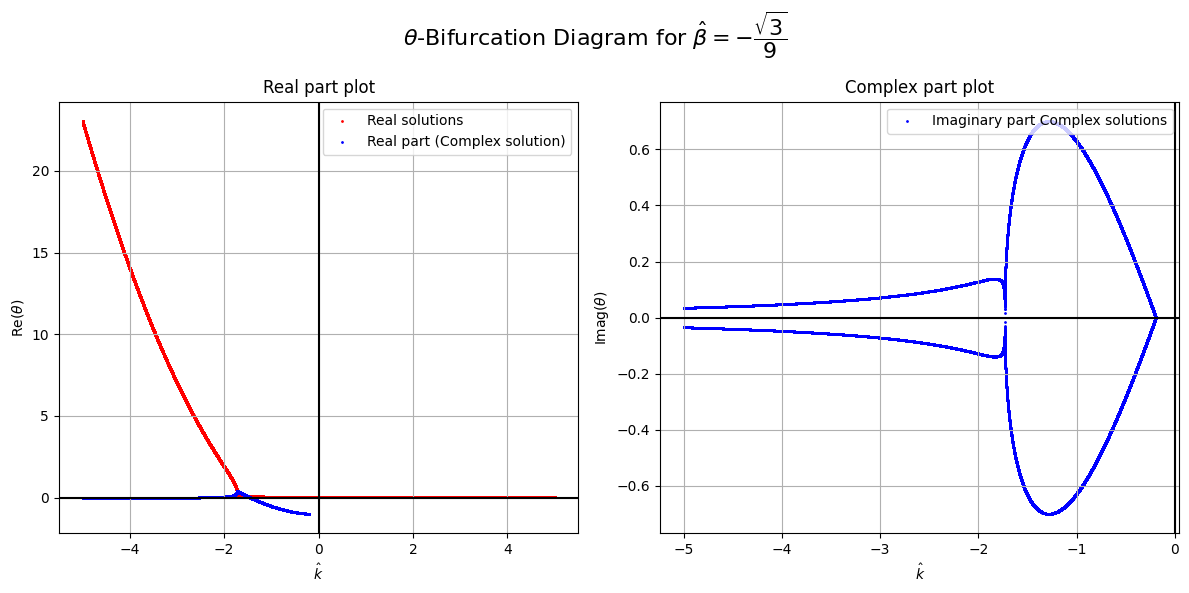

In [15]:
b = -np.sqrt(3)/9
df_ = get_fixed_b(b=b, minb=-5,maxb=5,num_points = 100000,fun = theta_values)
theta_plot_fixed_b(df_,b=b,blabel = '- \\dfrac{\\sqrt{3}}{9}', save=None)

Null parameters (=0)

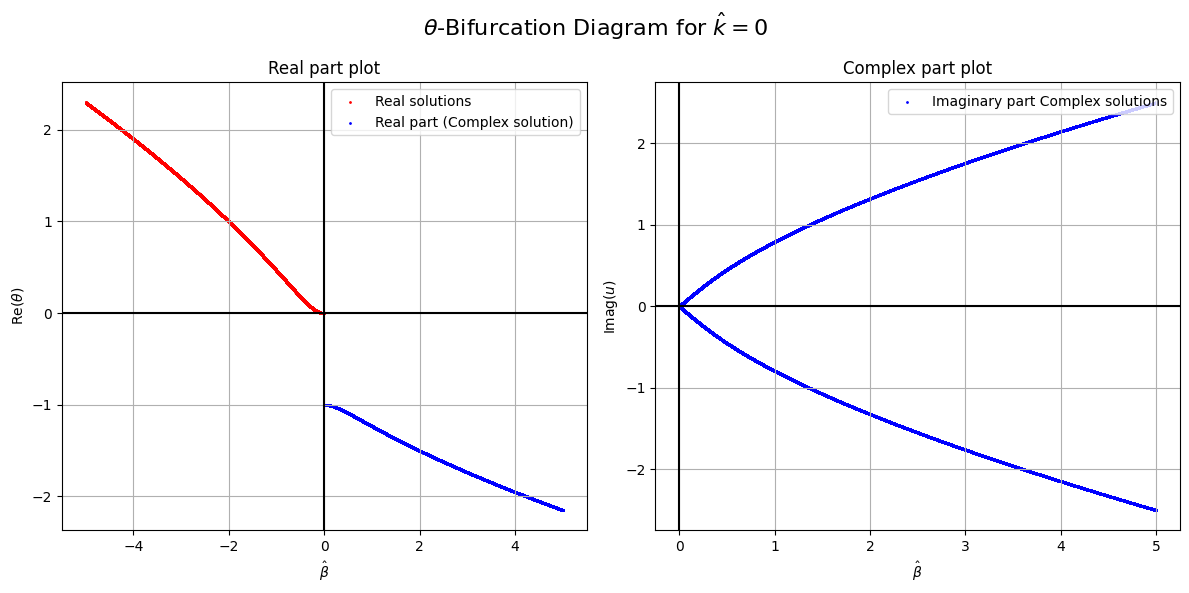

In [16]:
k = 0
df_ = get_fixed_k(k=k, minb=-5,maxb=5,num_points = 100000,fun = theta_values)
theta_plot_fixed_k(df_,k = k,save=None)

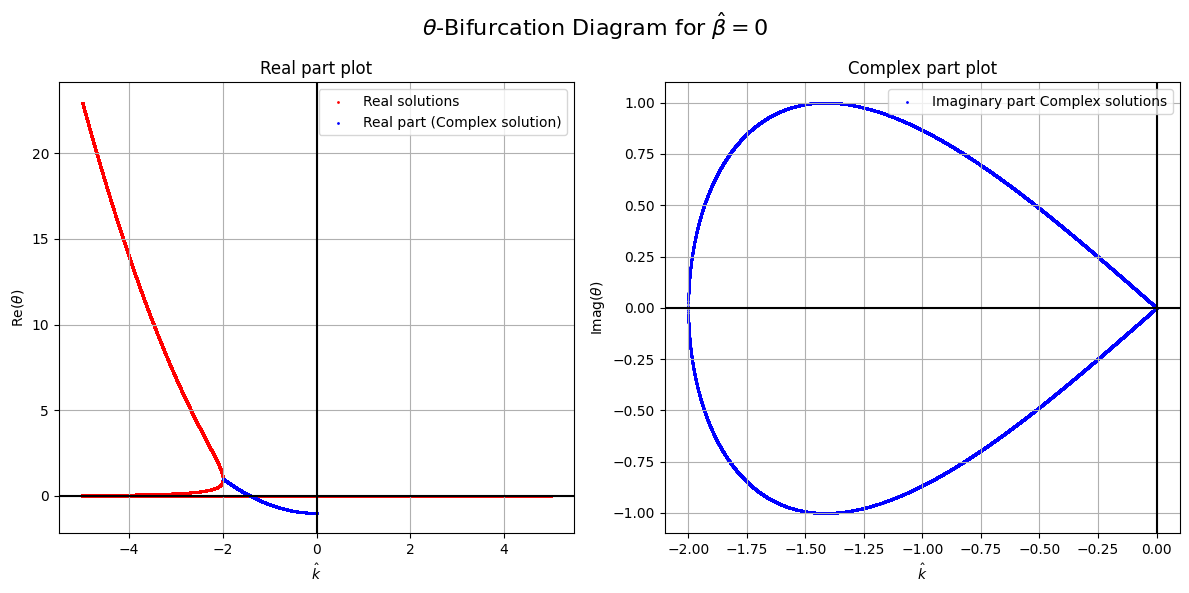

In [17]:
b = 0
df_ = get_fixed_b(b=b, minb=-5,maxb=5,num_points = 100000,fun = theta_values)
theta_plot_fixed_b(df_,b=b,save=None)

### Fourth set of plots (3D static plot x = k, y = beta , z = real part and x = k, y = beta , z = imaginary part) for $\theta$ values

In [18]:
from magnetic_isolation.bifurcation_plots import theta_plot_kb_3d

In [19]:
grid = get_grid(mink = -6, maxk = 6, minb = -6, maxb = 6, num_points = 150, fun = theta_values)
grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33710 entries, 0 to 33709
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   k          33710 non-null  float64
 1   b          33710 non-null  float64
 2   u_real     33710 non-null  float64
 3   u_complex  33710 non-null  float64
dtypes: float64(4)
memory usage: 1.0 MB


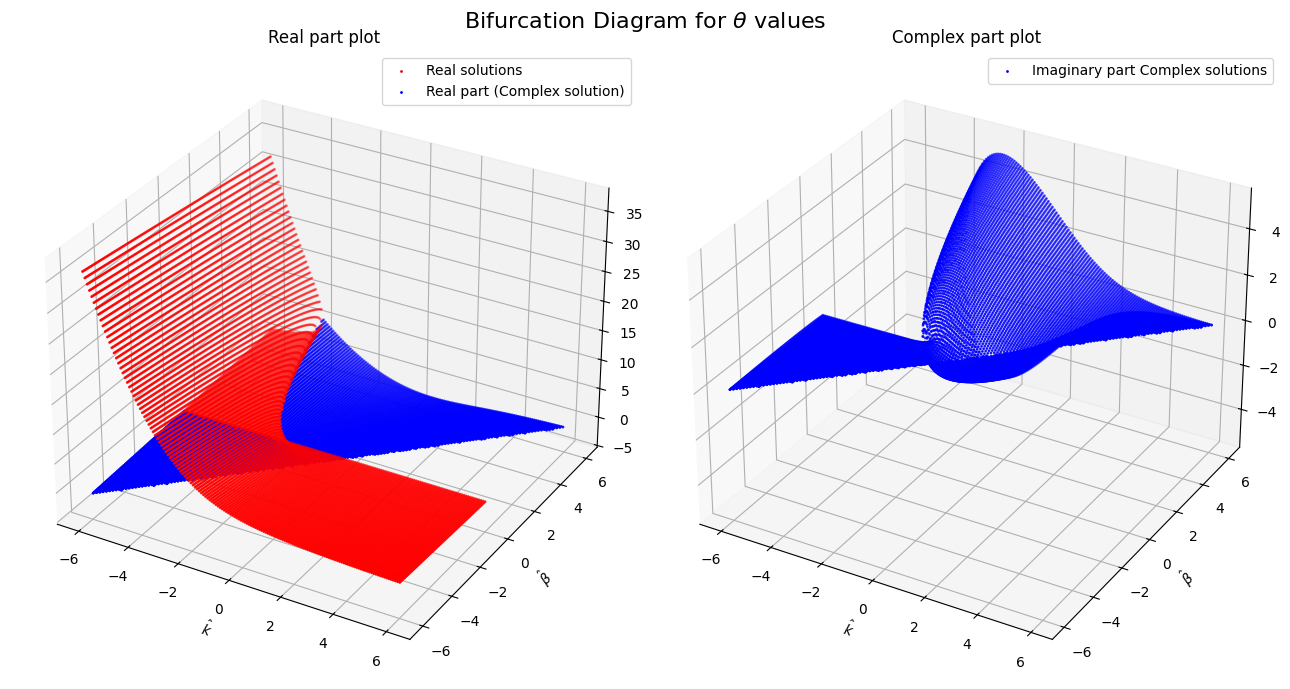

In [20]:
theta_plot_kb_3d(grid,save=None)